In [1]:
# This notebook is a test of the teleportation circuit
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

%matplotlib inline

In [2]:
# Create the qb that i am going to teleport
psi = random_statevector(2) # 1 random qb
psi = psi.data # converting psi type to make it fit the input of the drawing function
psi

array([0.05791724-0.11590774j, 0.9222295 -0.36428523j])

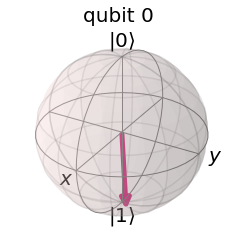

In [3]:
plot_bloch_multivector(psi)

In [4]:
# Creating a new gate that converts any state to the random qb
init_gate = Initialize(psi)
init_gate.label = 'psi'

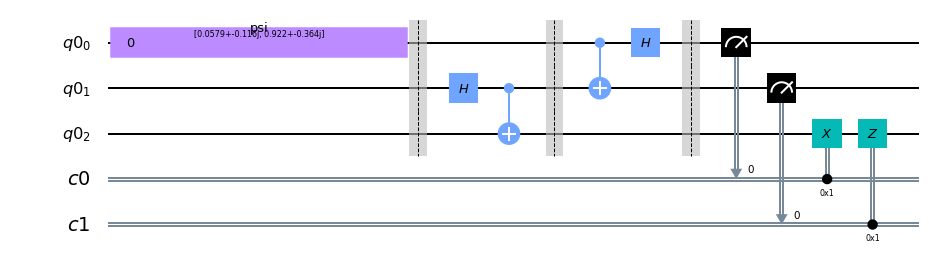

In [5]:
# Creating the circuit
qr = QuantumRegister(3) # 3 qb
cr1 = ClassicalRegister(1) # 2 classical bits in 2 registers
cr2 = ClassicalRegister(1)
circ = QuantumCircuit(qr, cr1, cr2) # Our circuit
circ.append(init_gate, [0]) # |0> --> |psi>
circ.barrier()

# q_0 = psi qb
# q_1 = Alice's qb
# q_2 = Bob's qb

# Entaglement between A and B qb
circ.h(1)
circ.cx(1, 2)
circ.barrier()

# Alice's gates
circ.cx(0, 1)
circ.h(0)
circ.barrier()

# Measurement
circ.measure(0, 0)
circ.measure(1, 1)

# Compare results
# 00 → Do nothing
# 01 → Apply X gate
# 10 → Apply Z gate
# 11 → Apply ZX gate

# Bob's gates
circ.x(2).c_if(cr1, 1)
circ.z(2).c_if(cr2, 1)



circ.draw(output = 'mpl')

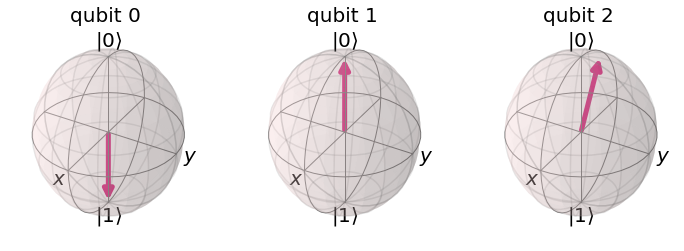

In [6]:
# Checking the result
backend = BasicAer.get_backend('statevector_simulator')
vector = execute(circ, backend).result().get_statevector()
plot_bloch_multivector(vector)
# Qubit 2 must be equal to psi

In [7]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright